<a href="https://colab.research.google.com/github/bazsi04/Szakdolgozat/blob/main/Tesztelesek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importálás

In [8]:
from heapq import heappush, heappop
import numpy as np
from itertools import combinations
import random
import networkx as nx
import math
import time
import matplotlib.pyplot as plt

### Tesztelés

In [10]:
#nemnegatív és konzervatív algoritmusok ugyanazon megoldásokat adják nemnegatív élsúlyozásra
n = 100
_, adj_list, s = erdos_renyi(n, 0.4)
R1, pv1, pe1 = nemneg_mon((n, adj_list, s))
R2, pv2, pe2 = konz_mon((n, adj_list, s))

for u in adj_list:
    if u not in R1 and u not in R2:
        continue
    if u not in R1:
        print(u, None, R2[u])
        continue
    if u not in R2:
        print(u, R1[u], None)
        continue
    if R1[u] != R2[u]:
        print(u, R1[u], R2[u])

Nemnegatív és konzervatív algoritmus futásidejének összehasonlítása

[1.3422966003417968e-05, 1.8372535705566407e-05, 1.4061927795410156e-05, 1.6498565673828126e-05, 2.0751953125e-05, 2.396106719970703e-05, 2.842903137207031e-05, 3.203392028808594e-05, 4.944324493408203e-05, 5.61666488647461e-05, 5.311012268066406e-05, 6.678104400634766e-05, 7.969379425048828e-05, 0.00019663333892822266, 9.229660034179688e-05, 0.00013981819152832033, 0.00013088703155517579, 0.00013095855712890624, 0.00020979404449462892, 0.00041536331176757814, 0.00032666683197021487, 0.00019499778747558594, 0.000247197151184082, 0.00033544063568115236, 0.0003760766983032227, 0.00040242671966552737, 0.00043815135955810547, 0.0005795001983642578, 0.0010737800598144532, 0.000573720932006836]
[0.00011658191680908204, 0.0002531623840332031, 0.00031755924224853517, 0.0004692220687866211, 0.0007367467880249023, 0.00096527099609375, 0.001260685920715332, 0.0017474746704101562, 0.0021898365020751953, 0.002718343734741211, 0.003240842819213867, 0.004530272483825684, 0.005143275260925293, 0.00620

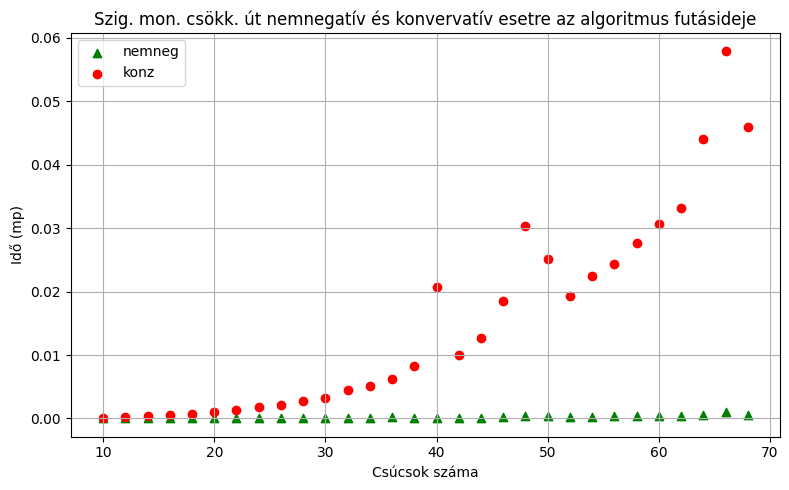

0.46109477043151853


In [11]:
results1 = []
results2 = []
i=50
input = [0 for j in range(i)]
for n in range(10,70,2):
    for j in range(i):
        _, adj_list, s = erdos_renyi(n, 0.12)
        input[j] = (n, adj_list, s)

    start = time.time()
    for j in range(i):
        """
        _, adj_list, s = erdos_renyi(n, 0.08)
        input = (n, adj_list, s)
        """
        nemneg_mon(input[j])
    end = time.time()
    results1.append((end-start)/i)


    start = time.time()
    for j in range(i):
        konz_mon(input[j])
    end = time.time()
    results2.append((end-start)/i)

print(results1)
print(results2)
x = range(10, n+1,2)

plt.figure(figsize=(8, 5))
plt.scatter(x, results1, label="nemneg", color="green", marker='^')
plt.scatter(x, results2, label="konz", color="red", marker='o')


plt.xlabel("Csúcsok száma")
plt.ylabel("Idő (mp)")
plt.title("Szig. mon. csökk. út nemnegatív és konvervatív esetre az algoritmus futásideje")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

sum=0
for i in results2:
  sum+=i
print(sum)

Nemnegatív élsúlyozású szig. mon. csökkenő algoritmus futásideje élszám függvényében

[0.00017542839050292968, 0.00021500587463378905, 0.0002834796905517578, 0.0003987789154052734, 0.0006415843963623047, 0.0009516239166259766, 0.0017286300659179687, 0.00176239013671875, 0.0030936241149902345, 0.0032360076904296873, 0.00455179214477539, 0.005543565750122071, 0.024791765213012695, 0.005942344665527344, 0.007234382629394531, 0.008962392807006836, 0.008803892135620116, 0.009326410293579102, 0.010370779037475585, 0.012236642837524413, 0.011572265625, 0.023970508575439455, 0.025727081298828124, 0.019531631469726564, 0.016845703125, 0.01601858139038086, 0.017071104049682616, 0.018393564224243163, 0.020401382446289064, 0.020041990280151366, 0.019431209564208983, 0.019999122619628905, 0.021965837478637694, 0.022356414794921876, 0.02567911148071289, 0.024910593032836915, 0.026613759994506835, 0.027440547943115234, 0.02707953453063965, 0.04712123870849609, 0.03153152465820312, 0.02995772361755371, 0.040618896484375, 0.0321497917175293, 0.03315029144287109, 0.05733027458190918, 0.0

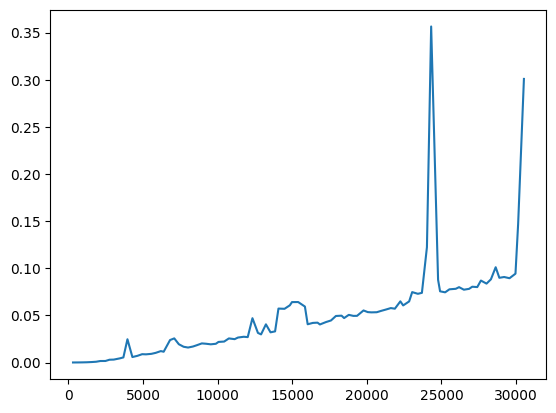

In [12]:
results = []
x = []
i=5
p0=0.5
n=250

input = [0 for j in range(i)]
for k in range(1,100):
    sum=0
    for j in range(i):
        p = p0*(k/101)
        _, adj_list, s = erdos_renyi(n, p)
        input[j] = (n, adj_list, s)
        for u in adj_list:
            sum += len(adj_list[u])

    start = time.time()
    for j in range(i):
        nemneg_mon(input[j])
    end = time.time()
    results.append((end-start)/i)
    x.append(sum/i)

print(results)
plt.plot(x,results)
plt.show()

konzervatív

In [ ]:
results = []
x = []
i=5
p0=0.5
n=80
input = [0 for j in range(i)]

for k in range(1,100):
    sum=0
    for j in range(i):
        p = p0*(k/101)
        _, adj_list, s = erdos_renyi(n, p)
        input[j] = (n, adj_list, s)
        for u in adj_list:
            sum += len(adj_list[u])

    start = time.time()
    for j in range(i):
        konz_mon(input[j])
    end = time.time()
    results.append((end-start)/i)

print(results)
x = range(1, k+1)
plt.plot(x,results)
plt.show()

In [ ]:
n = 50
k = 6

V, adj_list, s = erdos_renyi(n, 0.05)
input = (n, adj_list, s, k)
K, pv = k_el_min(input)

reached1 = 0
for u in range(n):
    if K[k][u] != np.inf:
        reached1 += 1
print("Reached:", reached1)

k = 50
input = (n, adj_list, s, k)

K, pv = k_el_min(input)

reached2 = 0
for u in range(n):
    if K[k][u] != np.inf:
        reached2 += 1
print("Reached:", reached2)

max k élű lineáris k-ra

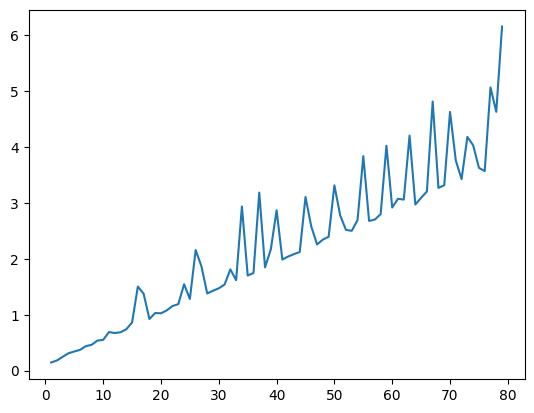

[0.14612531661987305, 0.18198871612548828, 0.24781274795532227, 0.3110969066619873, 0.3423290252685547, 0.3718717098236084, 0.4381570816040039, 0.4616842269897461, 0.5376276969909668, 0.5497791767120361, 0.6902074813842773, 0.6728572845458984, 0.686244010925293, 0.7402358055114746, 0.8617331981658936, 1.5043511390686035, 1.3747248649597168, 0.9233794212341309, 1.0310802459716797, 1.0247607231140137, 1.0777108669281006, 1.155712366104126, 1.1897177696228027, 1.5454699993133545, 1.2815890312194824, 2.156954765319824, 1.865065097808838, 1.3801865577697754, 1.4295589923858643, 1.4724111557006836, 1.5398800373077393, 1.8116307258605957, 1.6180291175842285, 2.935725450515747, 1.701169490814209, 1.7456343173980713, 3.1845271587371826, 1.8464794158935547, 2.168919563293457, 2.8676223754882812, 1.9862918853759766, 2.0410373210906982, 2.082814931869507, 2.121846914291382, 3.1047730445861816, 2.5768754482269287, 2.2568070888519287, 2.3427093029022217, 2.39443039894104, 3.3131392002105713, 2.77630

In [15]:
s = 1
n = 80
results = []


for k in range(1,n):
    start = time.time()
    for _ in range(100):
        _, adj_list, s = erdos_renyi(n, 0.08)
        input = (n, adj_list, s, k)
        k_el_min(input)
    end = time.time()
    results.append(end-start)

x = range(1, k+1)
plt.plot(x,results)
plt.show()
print(results)

Pontosan k élű exponenciális k-ra

[0.016962051391601562, 0.017956256866455078, 0.028539657592773438, 0.06107378005981445, 0.16683101654052734, 0.36135149002075195, 0.595360517501831, 1.0431246757507324, 2.6451117992401123, 5.3510167598724365, 12.815744400024414, 24.08256244659424, 51.20701026916504, 96.3710618019104]


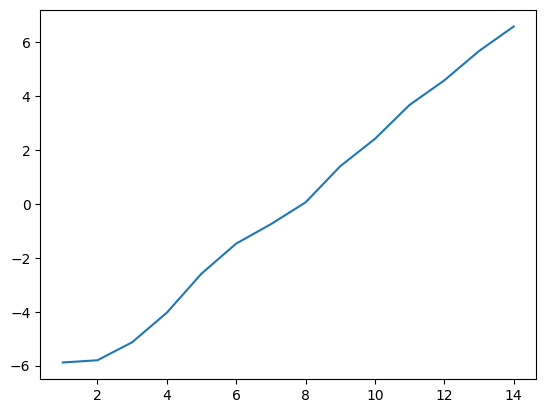

In [16]:
n=15
results = []
log_results = []
s = 1

for k in range(1,n):
    start = time.time()
    for _ in range(20):
        _, adj_list, s = erdos_renyi(n, 0.3)
        input = (n, adj_list, s, k)
        colorcoding(input)
    end = time.time()
    results.append(end-start)
    log_results.append(math.log2(end-start))


print(results)
x = range(1, k+1)
plt.plot(x, log_results)
plt.show()

[0.09196877479553223, 0.11831259727478027, 0.1074519157409668, 0.11826682090759277, 0.22079062461853027, 0.21468496322631836, 0.2216935157775879, 0.22146010398864746, 0.330852746963501, 0.4035983085632324, 0.34090638160705566, 0.3639693260192871, 0.5373499393463135, 0.4618864059448242, 0.49029064178466797, 0.575763463973999, 0.6275589466094971, 1.0750248432159424, 1.2085027694702148, 0.9463253021240234, 0.8634240627288818, 0.8510837554931641, 1.0240211486816406, 1.0080108642578125, 1.107513666152954, 1.1451005935668945, 1.2495553493499756, 1.2327008247375488, 1.6226022243499756, 1.985550880432129, 1.5080289840698242, 1.5755200386047363, 1.6635708808898926, 1.6743931770324707, 1.8050272464752197, 2.1905155181884766, 2.400320529937744, 2.0377442836761475, 2.0011496543884277, 2.2087655067443848, 2.1934287548065186, 3.319969892501831, 2.538740396499634, 2.580742835998535, 2.712712287902832, 3.00287127494812, 3.341679573059082, 3.098536491394043, 3.117446184158325, 3.924345016479492, 3.3992

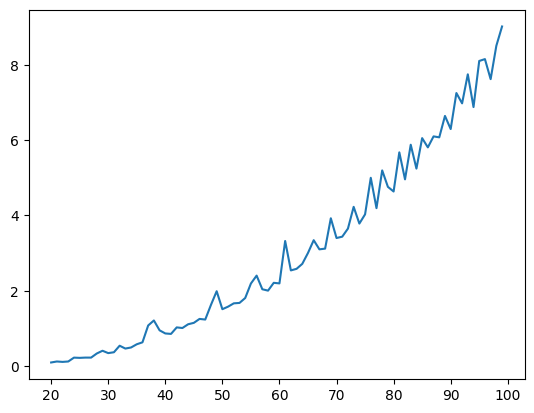

In [17]:
results = []
log_results = []

k=7
p=0.03
i = 60

for n in range(20,100):
    e = p*n*(n-1)
    start = time.time()
    for _ in range(i):
        _, adj_list, s = erdos_renyi(n, p)
        input = (n, adj_list, s, k)
        colorcoding(input)
    end = time.time()

    start1 = time.time()
    for _ in range(i):
        erdos_renyi(n, p)

    end1 = time.time()
    results.append(end-start-(end1-start1))
    log_results.append(math.log2(end-start))


print(results)
x = range(20, n+1)
plt.plot(x, results)
plt.show()

In [19]:
def test1(ex_out1, input1):
    assert ex_out1 == nemneg_mon(input1)

def test2(ex_out2, input2):
    assert ex_out2 == nemneg_mon(input2)

def test3(ex_out3, input3):
    assert ex_out3 == nemneg_mon(input3)

input1 = 4, {1: [(2, 10), (3, 2)], 2: [(4, 9)], 3: [(2, 1)], 4: []}, 1
ex_out1 = {1: 0, 2: 3, 3: 2, 4: 19}, {1: 1, 2: (3, 2), 3: (1, 3), 4: (2, 4)}, {(1, 2): 1, (1, 3): 1, (3, 2): (1, 3), (2, 4): (1, 2)}

input2 = 8, {1: [(2, 24), (4, 42), (7, 91), (8, 0)], 2: [(3, 23)], 3: [(4, 41), (6, 33), (8, 10)], 4: [(6, 49)], 5: [(4, 4), (7, 26)], 6: [(8, 45)], 7: [(6, 5), (8, 21)], 8: [(4, 6), (5, 0), (7, 1)]}, 1
ex_out2 = {1: 0, 2: 24, 4: 42, 7: 58, 8: 0, 3: 47, 5: 57, 6: 96}, {1: 1, 2: (1, 2), 4: (1, 4), 7: (8, 7), 8: (1, 8), 3: (2, 3), 5: (8, 5), 6: (7, 6)}, {(1, 2): 1, (1, 4): 1, (1, 7): 1, (1, 8): 1, (2, 3): (1, 2), (3, 8): (2, 3), (8, 5): (3, 8), (8, 7): (3, 8), (8, 4): (3, 8), (7, 6): (1, 7), (7, 8): (1, 7)}

input3 = 8, {1: [(2, 40), (3, 3), (4, 41), (6, 48)], 2: [(5, 8)], 3: [(5, 17), (6, 5)], 4: [(5, 38)], 5: [(3, 40), (7, 31)], 6: [(2, 26)], 7: [(2, 46)], 8: [(3, 6), (5, 28), (7, 9)],}, 1
ex_out3 = {1: 0, 2: 40, 3: 3, 4: 41, 6: 48, 5: 48, 7: 110}, {1: 1, 2: (1, 2), 3: (1, 3), 4: (1, 4), 6: (1, 6), 5: (2, 5), 7: (5, 7)}, {(1, 2): 1, (1, 3): 1, (1, 4): 1, (1, 6): 1, (2, 5): (1, 2), (4, 5): (1, 4), (6, 2): (1, 6), (5, 7): (4, 5)}


test1(ex_out1, input1)
test2(ex_out2, input2)
test3(ex_out3, input3)